In [2]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4
iimport numpy as np
import pymc3 as pm
from pymc3 import Model, Normal, Slice, sample, traceplot
import random
import numpy as np
import matplotlib.pyplot as plt
import arviz
from scipy.stats import bernoulli
import scipy as sp
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 1.4MB 5.5MB/s 
     |████████████████████████████████| 4.7MB 10.3MB/s 
     |████████████████████████████████| 317kB 42.7MB/s 
     |████████████████████████████████| 911kB 5.6MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 5.8MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp36-none-any.whl size=2667178 sha256=b299812a24838781b77828d754b2165264f53c6d85be06e753e2f4e8ffc5b328
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [15]:
beta0 = -120
beta1 = 3
sigma_w = 4
mean_h = 60
sigma_h = 5


In [16]:
def sampler(k):
  H = np.random.normal(mean_h,sigma_h,k)
  W = beta0 + beta1*H + np.random.rand(k)*sigma_w
  return H,W

In [17]:
H,W=sampler(1000)


Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma_w1]
>Metropolis: [beta_1]
>Metropolis: [beta_0]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:04<00:00, 2168.42it/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma_w1]
>Metropolis: [beta_1]
>Metropolis: [beta_0]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:05<00:00, 2049.57it/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma_w1]
>Metropolis: [beta_1]
>Metropolis: [beta_0]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:05<00:00, 1831.83it/s]
The rhat statistic is larg

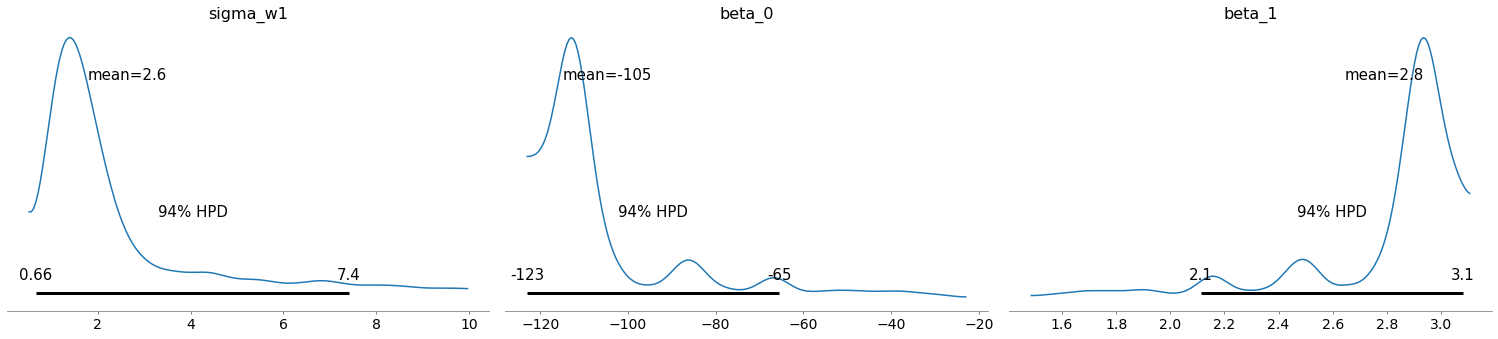

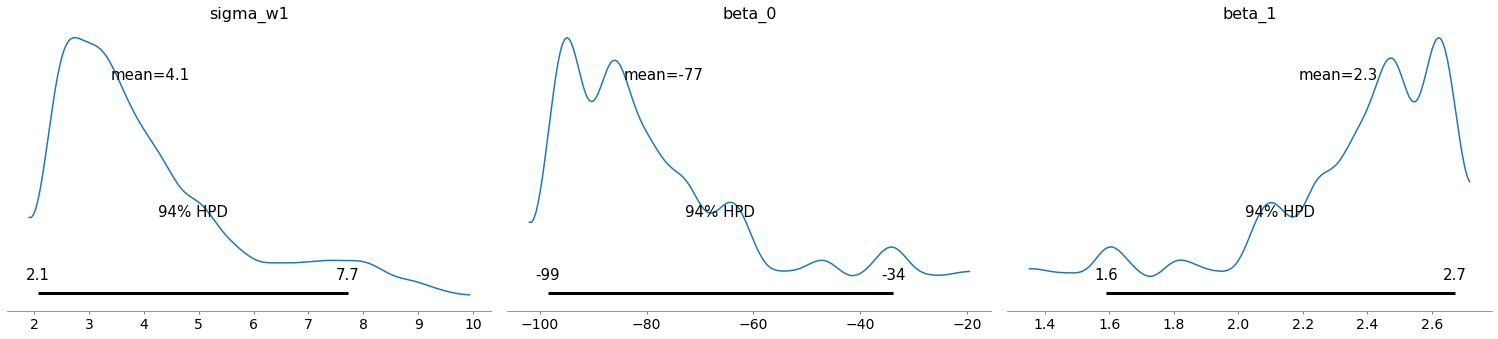

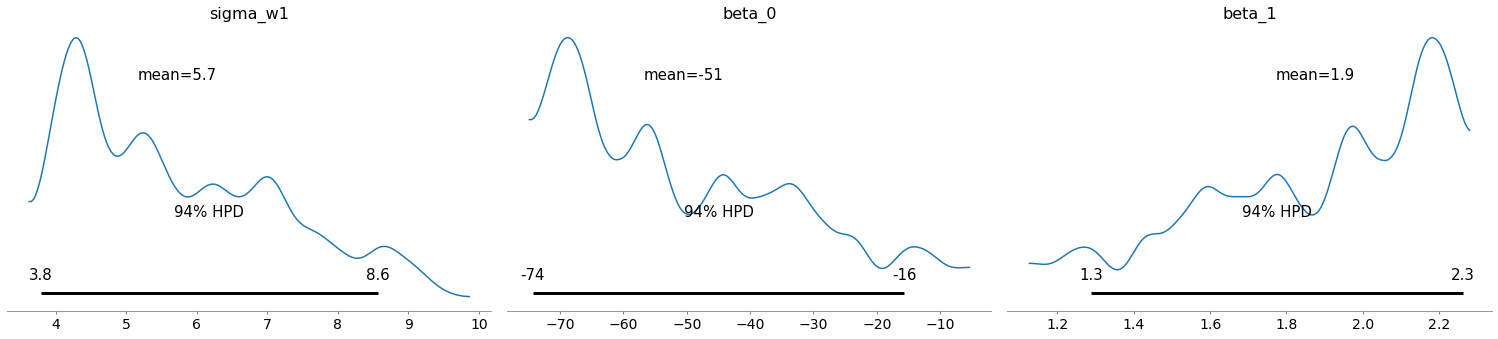

In [18]:
size=[10,100,1000]
for i in size:
  with pm.Model() as model:
    beta_0 = pm.Uniform('beta_0',lower = -500,upper = 500)
    beta_1 = pm.Uniform('beta_1',lower = -10,upper = 10)
    sigma_w1 = pm.Uniform('sigma_w1',lower = 0,upper = 10)
    mu = beta_0 + beta_1*H[:i]
    W_obs = pm.Normal('W_obs',mu = mu,sd = sigma_w1,observed = W[:i])
    step = pm.Metropolis()
    trace = pm.sample(10000,step,random_seed = 123)
  pm.plot_posterior(trace,var_names=["sigma_w1","beta_0","beta_1"])

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(H[:10].reshape(-1, 1), W[:10])
beta1_new=model.coef_
beta0_new=model.intercept_
X_with_intercept = np.empty(shape=(10, 2), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:2] = H[:10].reshape(-1, 1)
y_hat = model.predict(H[:10].reshape(-1, 1))
residuals = W[:10] - y_hat
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares / (10 - 2)
sigma_squared_hat
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
sd_beta=[]
for p_ in range(2):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    sd_beta.append(standard_error)
    print(f"SE(beta_hat[{p_}]): {standard_error}")
sigma_squared_hat
sd_beta

SE(beta_hat[0]): 2.900487289504583
SE(beta_hat[1]): 0.04807827541505575


[2.900487289504583, 0.04807827541505575]

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma_w1]
>Metropolis: [beta_1]
>Metropolis: [beta_0]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:04<00:00, 2375.88it/s]
The estimated number of effective samples is smaller than 200 for some parameters.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma_w1]
>Metropolis: [beta_1]
>Metropolis: [beta_0]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:04<00:00, 2206.06it/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma_w1]
>Metropolis: [beta_1]
>Metropolis: [beta_0]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:04<00:00, 2295.73it/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The est

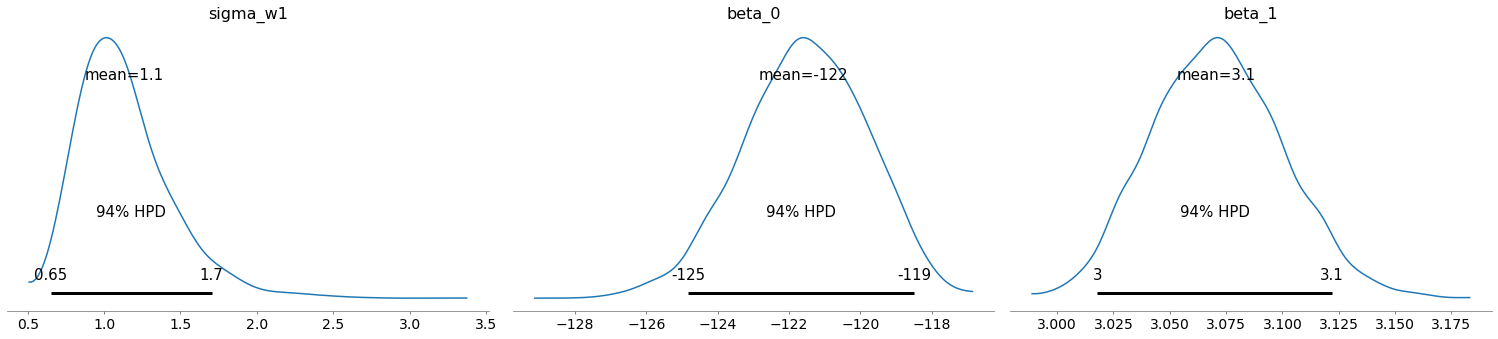

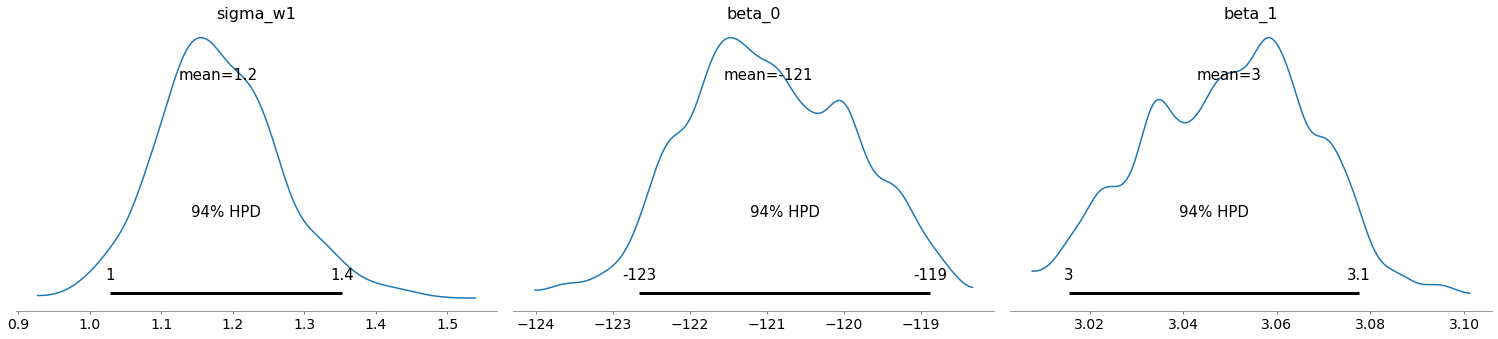

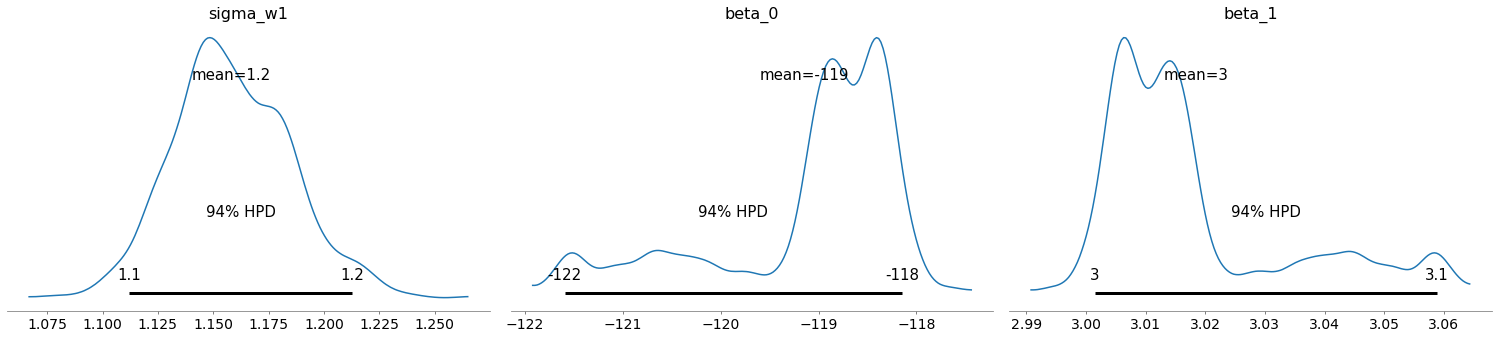

In [20]:

for i in size:
  with pm.Model() as model:
    beta_0 = pm.Normal('beta_0',mu=beta0_new,sd = sd_beta[0])
    beta_1 = pm.Normal('beta_1',mu=beta1_new[0],sd = sd_beta[1])
    sigma_w1 = pm.Normal('sigma_w1',mu=sigma_squared_hat**0.5,sd = 2)
    mu = beta_0 + beta_1*H[:i]
    W_obs = pm.Normal('W_obs',mu = mu,sd = sigma_w1,observed = W[:i])
    step = pm.Metropolis()
    trace = pm.sample(10000,step,random_seed = 123)
  pm.plot_posterior(trace,var_names=["sigma_w1","beta_0","beta_1"])